
<br><br>

***

<br><br>


<center><font size="7" color="purple">Text and Annotations</font></center>

<br><br>

***
<br><br><br><br>


In [1]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import numpy as np 
import datetime as dt 
import scipy.stats as stats

<br><br>

<center><strong>Annotations</strong></center>

<br>
Adding text at a certain spot
<br>


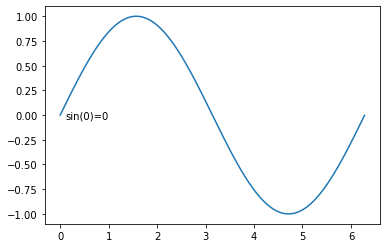

In [30]:
x = np.arange(0, 2*np.pi, .01)
y = np.sin(x)
plt.plot(x, y)
plt.text(0.1, -0.04, 'sin(0)=0')
plt.show()

<br>

Add an arrow.

<br>

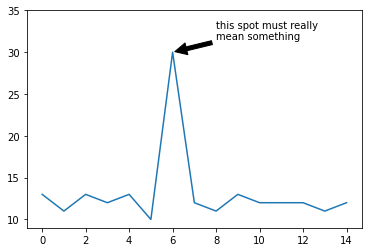

In [31]:
y = [13, 11, 13, 12, 13, 10, 30, 12, 11, 13, 12, 12, 12, 11, 12]
d = {  "facecolor": "black",  "shrink": 0.05 }

plt.plot(y)
plt.ylim(ymax=35)
plt.annotate('this spot must really\nmean something', xy=(6, 30), xytext=(8, 31.5), arrowprops=d)
plt.show()

<br>

Plot a normal distribution and fill in the top and bottom 2.5%

<br>

Text(-1, 0.12, 'Value At Risk ')

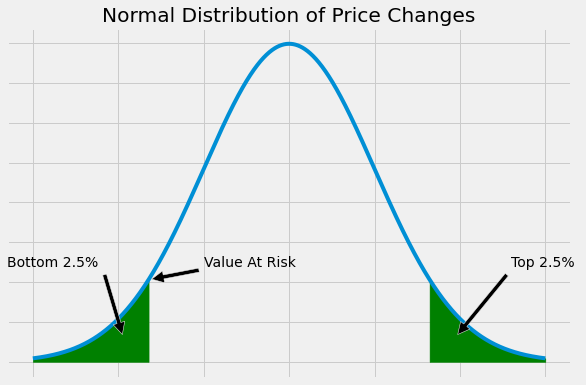

In [3]:
x = np.arange(-3, 3, 0.001)
y = stats.norm.pdf(x, 0, 1)
x2 = np.arange(-3, -1.644, 0.001)
y2 = y[0:len(x2)]
x3 = np.arange(1.644, 3, 0.001)
y3 = y[(len(y)-len(x3)):len(y)]


fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fivethirtyeight')
ax.plot(x,y)

ax.fill_between(x2,0, y2,color='g')
ax.fill_between(x3,0, y3, color='g')
# ax.set_xlabel('Losses')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title('Normal Distribution of Price Changes')
d = {  "facecolor": "black",  "shrink": 0.05 }
plt.annotate('Bottom 2.5% ', xy=(-1.94, .03), xytext=(-3.3, .12), arrowprops=d)
plt.annotate('Top 2.5% ', xy=(1.94, .03), xytext=(2.6, .12), arrowprops=d)
plt.annotate('Value At Risk ', xy=(-1.64, 0.10311), xytext=(-1, .12), arrowprops=d)



<br>

xy sets the location. the arrowprops parameter sets the look of the arrow
<br>
connectionstyle creates curved arrows
<br>
the x,y axis are set in the first line

<br>

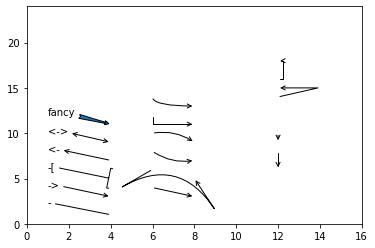

In [32]:
plt.axis([0, 16, 0, 24])
arrstyles = ['-', '->', '-[', '<-', '<->', 'fancy']


# connstyles in the center, change the 2nd entry ..   "arc,angleA=10,armA=30,rad=15"

constyles = [ "angle,angleA=-90,angleB=180,rad=0", "arc3,rad=0.", "arc3,rad=-0.3", "arc,angleA=-90,angleB=0,armA=0,armB=40,rad=0",  "bar,fraction=0.3"]

connstyles=["arc", "arc,angleA=30,armA=30,rad=65", "arc3,rad=.2", "arc3,rad=-.2", "angle", "angle3"]

for i, style in enumerate(arrstyles):
    d= { 'arrowstyle' :style }  
    plt.annotate(style, xytext=(1, 2+2*i), xy=(4, 1+2*i),arrowprops=d)

for i, style in enumerate(connstyles):
    d= { 'arrowstyle' :'->', 'connectionstyle' : style }
    plt.annotate("", xytext=(6, 4+2*i), xy=(8, 3+2*i), arrowprops=d)
    

for i, style in enumerate(constyles):
    d= { 'arrowstyle' :'->', 'connectionstyle' : style }
    plt.annotate("", xytext=(12, 8+2*i), xy=(12, 6+3*i), arrowprops=d)
        
    
    
plt.show()

<br>
    
xy(x1,y1) is where the arrow points to.  xytext(x2,y2) is where the arrow starts.
    
<br>

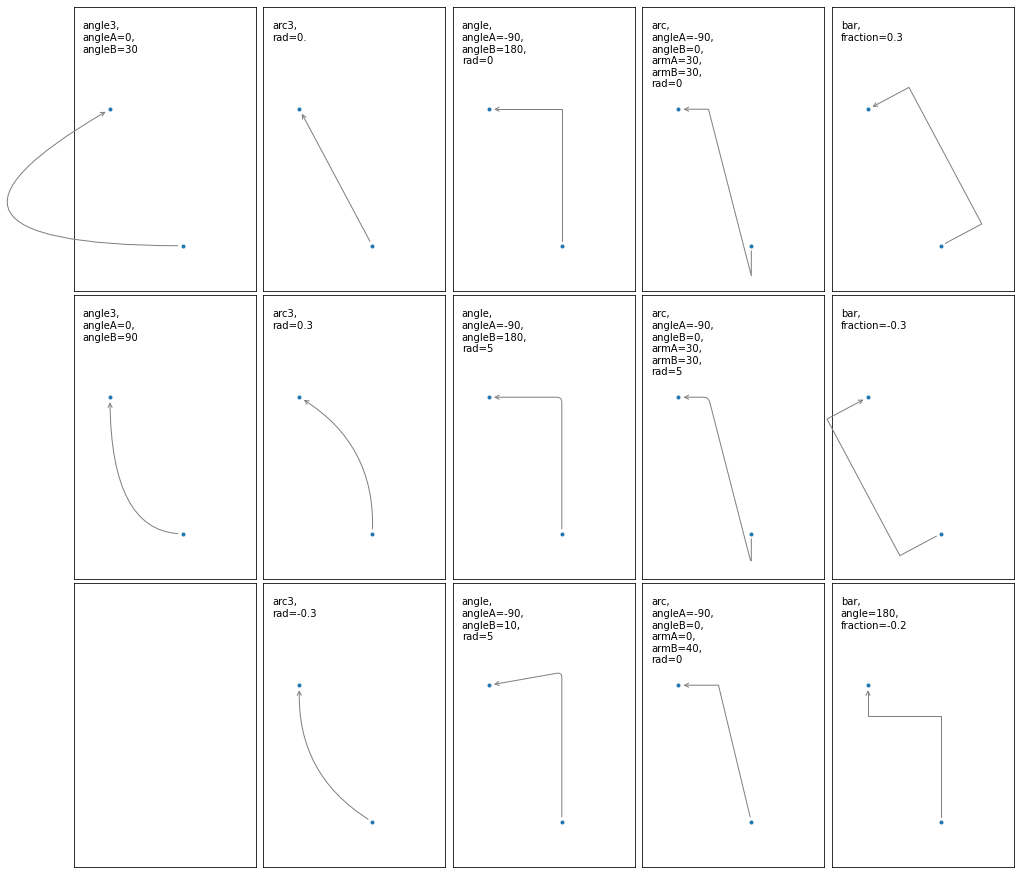

In [33]:
def demo_con_style(ax, connectionstyle):
    x1, y1 = 0.2, 0.8
    x2, y2 = 0.6, 0.2

    ax.plot([x1, x2], [y1, y2], ".")
    ax.annotate("",
                xy=(x1, y1), xycoords='data',
                xytext=(x2, y2), textcoords='data',
                arrowprops=dict(arrowstyle="->", color="0.5",
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle=connectionstyle
                     ),
                horizontalalignment='left',
                verticalalignment='bottom'
                )

    ax.text(.05, .95, connectionstyle.replace(",", ",\n"),
            transform=ax.transAxes, ha="left", va="top")


fig, axs = plt.subplots(3, 5, figsize=(14, 12), constrained_layout=True)
demo_con_style(axs[0, 0], "angle3,angleA=0,angleB=30")
demo_con_style(axs[1, 0], "angle3,angleA=0,angleB=90")
demo_con_style(axs[0, 1], "arc3,rad=0.")
demo_con_style(axs[1, 1], "arc3,rad=0.3")
demo_con_style(axs[2, 1], "arc3,rad=-0.3")
demo_con_style(axs[0, 2], "angle,angleA=-90,angleB=180,rad=0")
demo_con_style(axs[1, 2], "angle,angleA=-90,angleB=180,rad=5")
demo_con_style(axs[2, 2], "angle,angleA=-90,angleB=10,rad=5")
demo_con_style(axs[0, 3], "arc,angleA=-90,angleB=0,armA=30,armB=30,rad=0")
demo_con_style(axs[1, 3], "arc,angleA=-90,angleB=0,armA=30,armB=30,rad=5")
demo_con_style(axs[2, 3], "arc,angleA=-90,angleB=0,armA=0,armB=40,rad=0")
demo_con_style(axs[0, 4], "bar,fraction=0.3")
demo_con_style(axs[1, 4], "bar,fraction=-0.3")
demo_con_style(axs[2, 4], "bar,angle=180,fraction=-0.2")

for ax in axs.flat:
    ax.set(xlim=(0, 1), ylim=(0, 1.25), xticks=[], yticks=[], aspect=1.25)
fig.set_constrained_layout_pads(wspace=0, hspace=0, w_pad=0, h_pad=0)

plt.show()

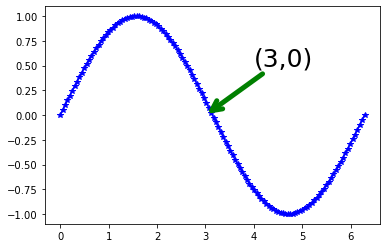

In [34]:
theta = np.linspace(0, 2*np.pi, 128)
y = np.sin(theta)

plt.plot(theta, np.sin(theta), 'b-*')
a = plt.annotate("(3,0)", xy=(3, 0), xycoords='data', xytext=(4.0, 0.5), textcoords='data',
                 arrowprops=dict(arrowstyle="->", color="green", lw=5,  
                 connectionstyle=("arc3,rad=0.")))
plt.setp(a, size=25)

plt.show()

<br>

text in different positions and formats

<br>

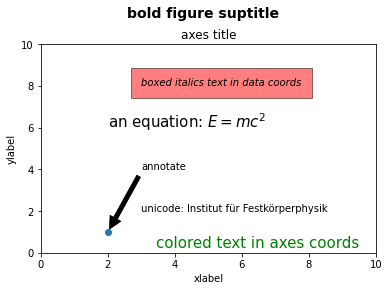

In [35]:

fig = plt.figure()
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

ax = fig.add_subplot()
fig.subplots_adjust(top=0.85)
ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)

ax.text(3, 2, 'unicode: Institut f\374r Festk\366rperphysik')

ax.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)


ax.plot([2], [1], 'o')
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.set(xlim=(0, 10), ylim=(0, 10))

plt.show()



<br>

arrow style

<br>

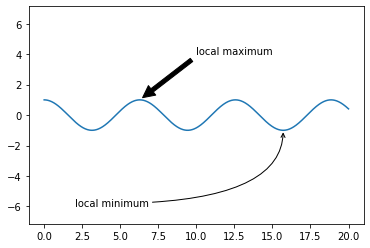

In [36]:


fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));
       

<br>

the transform parameter specifies the units of the location

<br>

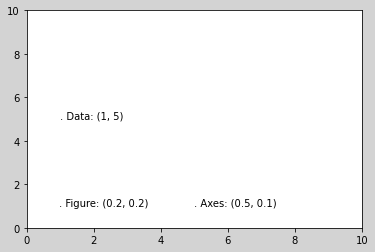

In [37]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

# transform=ax.transData is the default, but we'll specify it anyway
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)   # position where x=1 and y =5
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)   # position .5 across the whole x axis
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure);

# Note Figure is the entire box including the grey frame, Axes is just the insdide white window 

<br>

you can position the annotation on x/y values even if its a date
note pandas datetime is different then datetime. It works but pd.datetime may be deprecated

<br>

<ipython-input-38-a25764a50a7a>:26: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_by_date.index = [pd.datetime(2012, month, day)


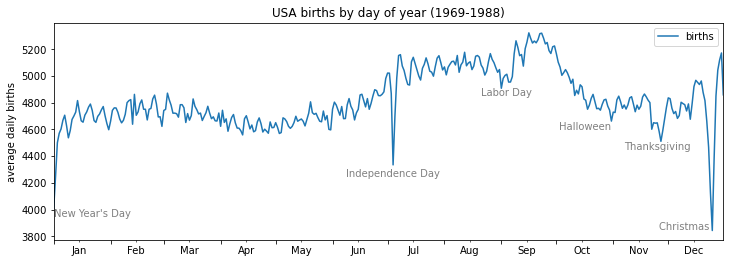

In [38]:

import pandas as pd
import datetime as dt 

births = pd.read_csv(r'C:\Users\arono\source\Reference\Jupyter\Plots\births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

# births.year is 15,000 records   1969, 1969, 1969, etc..



births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')

# births.index ...  DatetimeIndex(['1969-01-01', '1969-01-01', '1969-01-02' etc..

# so births is 15,000 records of date components but births.index has the complete date

births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);


      # Add labels to the plot
style = dict(size=10, color='gray')

# ax.text method takes an x position, a y position, a string, and then optional keywords specifying the color,
#        size, style, alignment, and other properties of the text. Here we used ha='right' and ha='center',
#         where ha is short for horizonal alignment

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

<br>

instead of text, you can use annotate

<br>

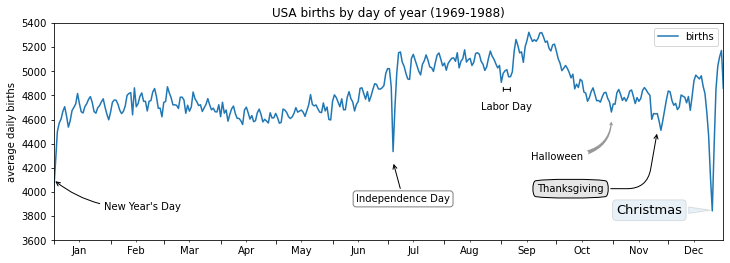

In [39]:

fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
ax.annotate("New Year's Day", xy=('2012-1-1', 4100),  xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))


ax.annotate("Independence Day", xy=('2012-7-4', 4250),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
            xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

ax.annotate('Halloween', xy=('2012-10-31', 4600),  xycoords='data',
            xytext=(-80, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500),  xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=80,rad=20"))



ax.annotate('Christmas', xy=('2012-12-25', 3850),  xycoords='data',
             xytext=(-30, 0), textcoords='offset points',
             size=13, ha='right', va="center",
             bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

ax.set_ylim(3600, 5400);



<br>

add latex to the ticks

<br>

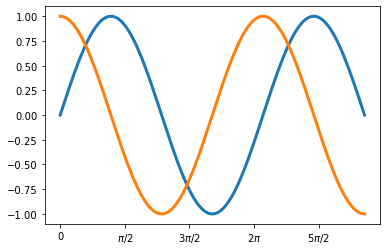

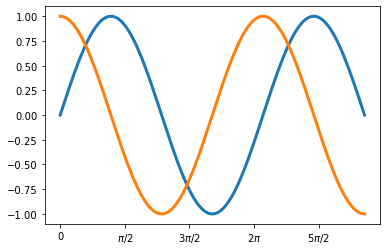

In [40]:

def format_func(value, tick_number):
    #   find number of multiples of pi/2
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)

fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')
       
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig

<br>

Latex. Make sure you use r"" to prevent the syntax from being evaluated before latex does

<br>

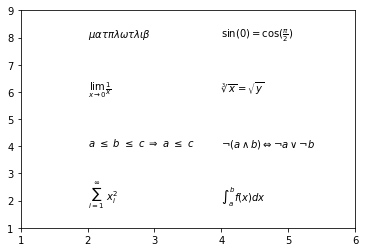

In [41]:
fig = plt.figure()
ax= fig.add_subplot(111)
ax.set_xlim([1,6])
ax.set_ylim([1,9])
ax.text(2, 8, r"$ \mu \alpha \tau \pi \lambda \omega \tau \lambda \iota \beta $")
ax.text(2, 6, r"$ \lim_{x \rightarrow 0} \frac{1}{x} $")
ax.text(2, 4, r"$ a \ \leq \ b \ \leq \ c \ \Rightarrow \ a \ \leq \ c$")
ax.text(2, 2, r"$ \sum_{i=1}^{\infty}\ x_i^2$")
ax.text(4, 8, r"$ \sin(0) = \cos(\frac{\pi}{2})$")
ax.text(4, 6, r"$ \sqrt[3]{x} = \sqrt{y}$")
ax.text(4, 4, r"$ \neg (a \wedge b) \Leftrightarrow \neg a \vee \neg b$")
ax.text(4, 2, r"$ \int_a^b f(x)dx$")
plt.show()